In [548]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
np.random.seed(54321)

# Question 1.a and 1.b
## Generate points (vectors) and plot them on unit sphere 

In [549]:
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

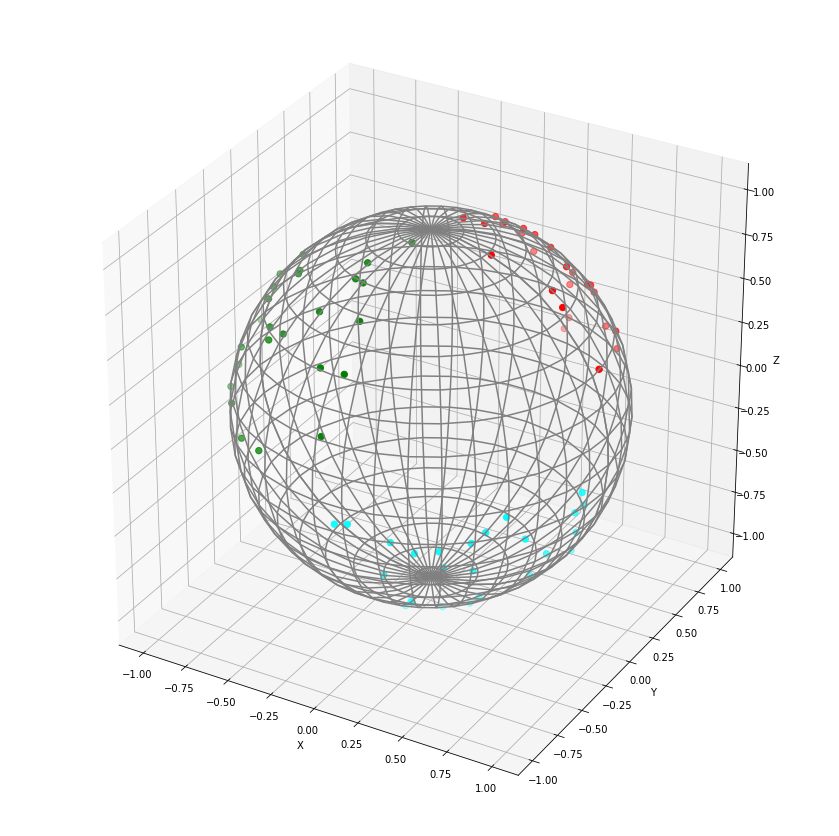

In [550]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)

x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(75)

# Training points for each class
xi[:25] = np.abs(xi[:25])
yi[:25] = np.abs(yi[:25])
zi[:25] = np.abs(zi[:25])

xi[25:50] = np.abs(xi[25:50])
yi[25:50] = -np.abs(yi[25:50])
zi[25:50] = -np.abs(zi[25:50])

xi[50:] = -np.abs(xi[50:])
yi[50:] = -np.abs(yi[50:])
zi[50:] = np.abs(zi[50:])

points = np.concatenate((xi, yi, zi)).reshape((-1, 3), order='F')

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'},figsize=(15,15))

# Set labels to axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot_wireframe(x, y, z, color='gray', rstride=1, cstride=1)
ax.scatter(xi[  :25], yi[  :25], zi[  :25], s=40, c='r', zorder=5)
ax.scatter(xi[25:50], yi[25:50], zi[25:50], s=40, c='cyan', zorder=5)
ax.scatter(xi[50:  ], yi[50:  ], zi[50:  ], s=40, c='g', zorder=5)

# Q1.c

## Generate and plot random normalized weights

In [551]:
ndim = 3
nweights = 3
weights = np.random.randn(ndim, nweights)
# Normalize
for w in weights:
    w /= np.sqrt(np.sum((w)**2))
weights

array([[-0.03402054, -0.96370664, -0.26478691],
       [ 0.86943946, -0.24092118, -0.43131428],
       [ 0.1828223 ,  0.01550274, -0.98302374]])

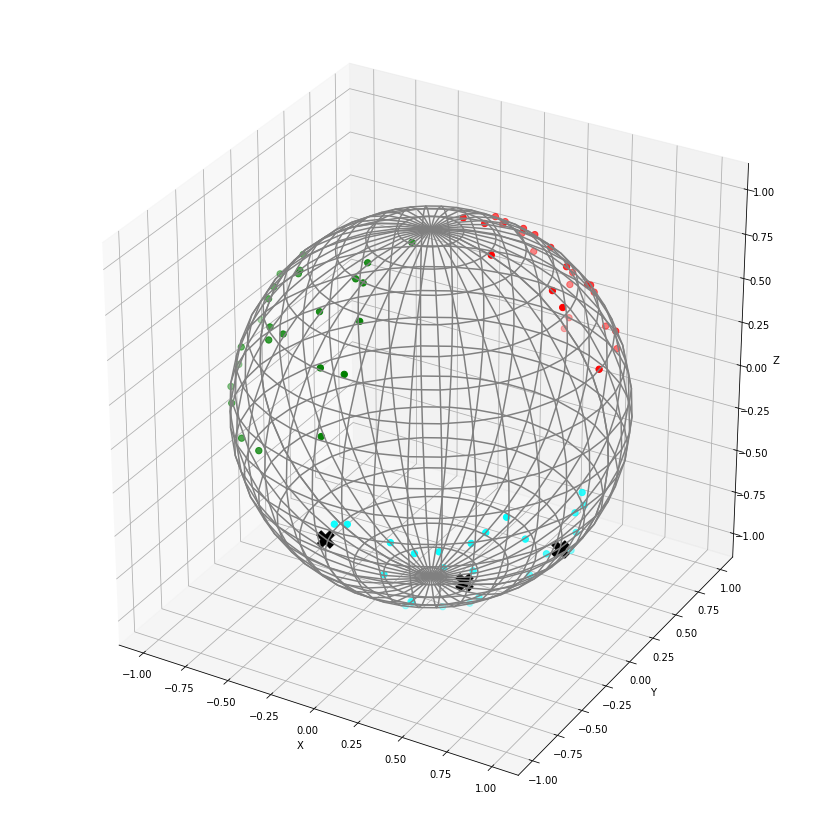

In [552]:
def plot_all(weights,W0s=[],W1s=[],W2s=[]):
    fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'},figsize=(15,15))

    # Set labels to axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.plot_wireframe(x, y, z, color='gray', rstride=1, cstride=1)
    ax.scatter(xi[  :25], yi[  :25], zi[  :25], s=40, c='r', zorder=5)
    ax.scatter(xi[25:50], yi[25:50], zi[25:50], s=40, c='cyan', zorder=5)
    ax.scatter(xi[50:  ], yi[50:  ], zi[50:  ], s=40, c='g', zorder=5)
    
    # Plot the trajectories
    if W0s!=[]:
        ax.plot(W0s[:,0], W0s[:,1], W0s[:,2], label='W0s',linewidth=3)
        ax.plot(W1s[:,0], W1s[:,1], W1s[:,2], label='W1s',linewidth=3)
        ax.plot(W2s[:,0], W2s[:,1], W2s[:,2], label='W2s',linewidth=3)
    
        ax.scatter(W0s[-1][0],W0s[-1][1],W0s[-1][2],s=300,c='purple',marker='X',zorder=5)
        ax.scatter(W1s[-1][0],W1s[-1][1],W1s[-1][2],s=300,c='purple',marker='X',zorder=5)
        ax.scatter(W2s[-1][0],W2s[-1][1],W2s[-1][2],s=300,c='purple',marker='X',zorder=5)

    else:
        for i in range(len(weights)):
            ax.scatter(weights[i][0],weights[i][1],weights[i][2],s=300,c='black',marker='X',zorder=5)
    
plot_all(weights)

# 1.d
## Generate the WTA Network

In [553]:
from random import shuffle

class WTA_Network():
    # Network is initiated with given weights in jumps array.
    def __init__(self,weights):
        self.weights = weights
        self.m = len(weights)
        
    def winning_prototype(self,row):
        dists = []
        for i in range(self.m):
            dists.append(self.my_dist(self.weights[i],row))
            #print('Distance %d is %f ' % (i,self.my_dist(self.weights[i],row)))
        #print('Winning weight index: %d' % dists.index(min(dists)))
        return dists.index(min(dists))
    
    def train(self,points,eta,n_ep=1000):
        W0s,W1s,W2s = [],[],[]

        W0s.append(self.weights[0].copy())
        W1s.append(self.weights[1].copy())
        W2s.append(self.weights[2].copy())
        
        # Shuffle points to be realistic.
        shuffle(points)

        for j,point in enumerate(points):
            winner_index = self.winning_prototype(point)
            self.weights[winner_index] += eta*(point-self.weights[winner_index])
            # Keep track of weights 
            W0s.append(self.weights[0].copy())
            W1s.append(self.weights[1].copy())
            W2s.append(self.weights[2].copy())

        return np.array(W0s),np.array(W1s),np.array(W2s)
    
    def my_dist(self,x,y):   
        return np.sqrt(np.sum((x-y)**2))


### Here is the initial weights

Initial weights are
[[-0.03402054 -0.96370664 -0.26478691]
 [ 0.86943946 -0.24092118 -0.43131428]
 [ 0.1828223   0.01550274 -0.98302374]]


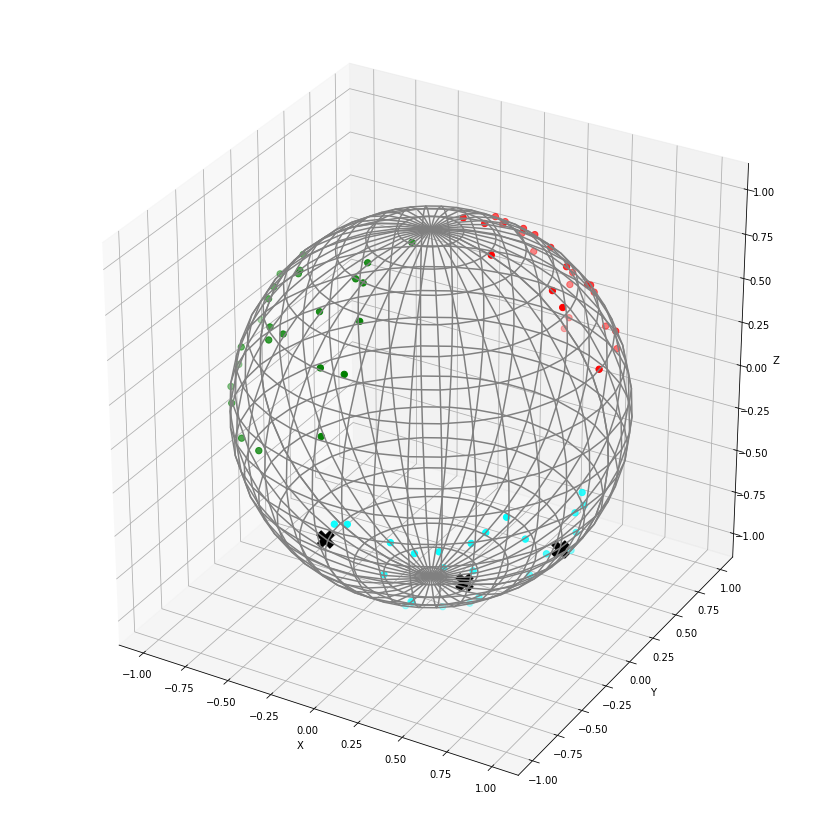

In [554]:
sizes = [3,3]
init_weights = weights.copy()
network = WTA_Network(init_weights)
print('Initial weights are')
print(network.weights)
plot_all(network.weights)

## Training and plotting the network
### Purple crosses on the plot are the final weights, lines behind them are trajectories.

Weights at the end:
[[-0.51457597 -0.4590778   0.41371869]
 [ 0.37733942  0.25721808  0.75845925]
 [ 0.59423128 -0.49993095 -0.36388406]]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


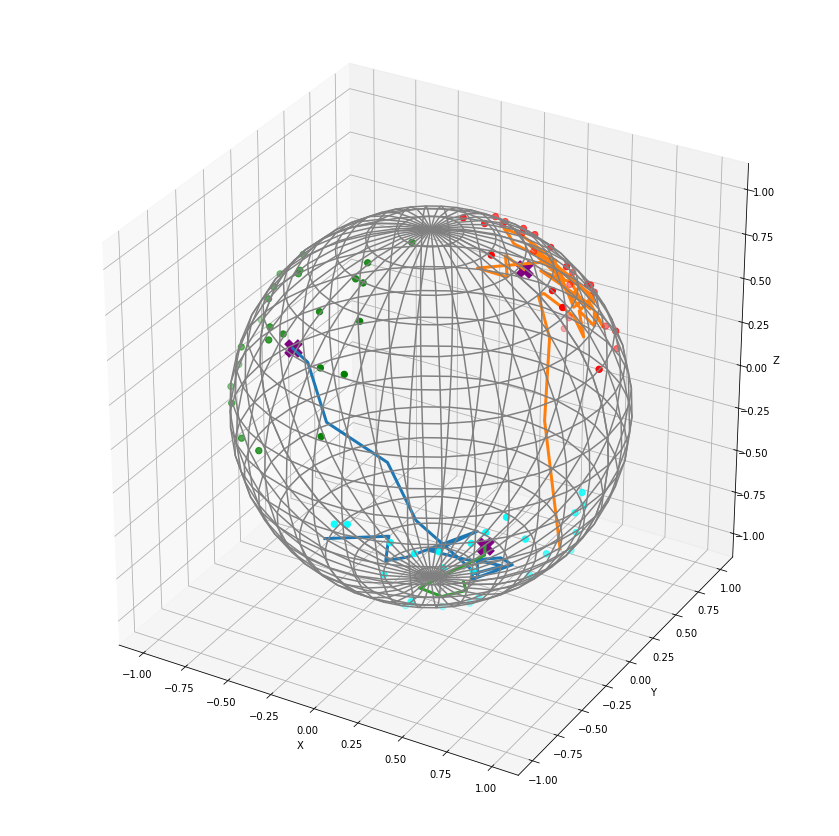

In [555]:
# eta is learning rate
eta = 0.4

W0s,W1s,W2s = network.train(points,eta)
print('Weights at the end:')
print(network.weights)
plot_all(init_weights,W0s,W1s,W2s)

# Q1.e
## Testing the Network
    - I tested the model with test points.
    - Obviously the model worked well.

In [556]:
def new_test():
    xtest, ytest, ztest = sample_spherical(6)

    # Test points for each class
    xtest[:2] = np.abs(xtest[:2])
    ytest[:2] = np.abs(ytest[:2])
    ztest[:2] = np.abs(ztest[:2])

    xtest[2:4] = np.abs(xtest[2:4])
    ytest[2:4] = -np.abs(ytest[2:4])
    ztest[2:4] = -np.abs(ztest[2:4])

    xtest[4:] = -np.abs(xtest[4:])
    ytest[4:] = -np.abs(ytest[4:])
    ztest[4:] = np.abs(ztest[4:])

    test_points = np.concatenate((xtest, ytest, ztest)).reshape((-1, 3), order='F')
    return test_points

## Testing with number of datasets of 6 data points.
 - One can see that it usually works well.

In [557]:
for i in range(10):
    cur_test = new_test()
    for test_point in cur_test:
        print(network.winning_prototype(test_point),end=' ')
    print()

1 1 2 2 0 0 
1 1 2 2 0 0 
1 1 2 2 0 0 
2 2 2 2 0 0 
1 1 2 2 0 0 
1 1 2 2 0 0 
1 1 2 2 0 0 
1 1 2 2 1 0 
1 1 2 2 0 0 
1 1 2 2 0 0 


# Conclusion & Evaluation
 - The above given examples are visualizations of a Winner Takes All Network. 
 - We can see that our model usually works well. Weights tries to converge until none of the weights changes.
 - One drawback may be that results are heavily depends on initial random weights. 
 - Another drawback of the algorithm may be that this is a very naive classification since we artificially created the data points. Algorithm may easily get stuck in local minima when a real data points are presented.
 